In [2]:
# From here: https://stackoverflow.com/questions/49264194/import-py-file-in-another-directory-in-jupyter-notebook
import sys
import os

module_path = os.path.abspath(os.path.join('..'))

if module_path not in sys.path:
    sys.path.append(module_path)


In [3]:
import numpy as np
import copy

from src.nqs import RBM, RandomHamiltonian, IsingHamiltonian, IsingHamiltonianReduced
import src.utils as utils
from config_parser import get_config_file

import matplotlib.pyplot as plt
%matplotlib notebook

In [7]:
def rms_error(x, y):
    return (np.sqrt(np.sum(np.abs(x - y))))

def brier_error(x, y):
    return np.sum((x - y)**2)/len(x)
    

In [ ]:
visible_size = 4
hidden_size = 4
walker_steps = 10

seed = 42  # Seed for random number generator
np.random.seed(seed)
H = IsingHamiltonian(n=visible_size)
rbm = RBM(visible_size=visible_size, hidden_size=hidden_size, hamiltonian=H, walker_steps=walker_steps)


mcmc, _ = np.histogram([utils.binary_array_to_int(state) for state in rbm.mcmc_dist()], 
         density=True, 
         bins=range(2**visible_size+1))

exact= rbm.probability_dist()
exact = exact.reshape(-1)

print(f"Brier error: {brier_error(mcmc, exact)}")
print(f"Eucleadian distance: {np.linalg.norm(mcmc-exact)}")
print(f"RMS error: {rms_error(mcmc, exact)}")


print(mcmc.shape)
print(exact.shape)
print(mcmc)
print(exact)




<IPython.core.display.Javascript object>


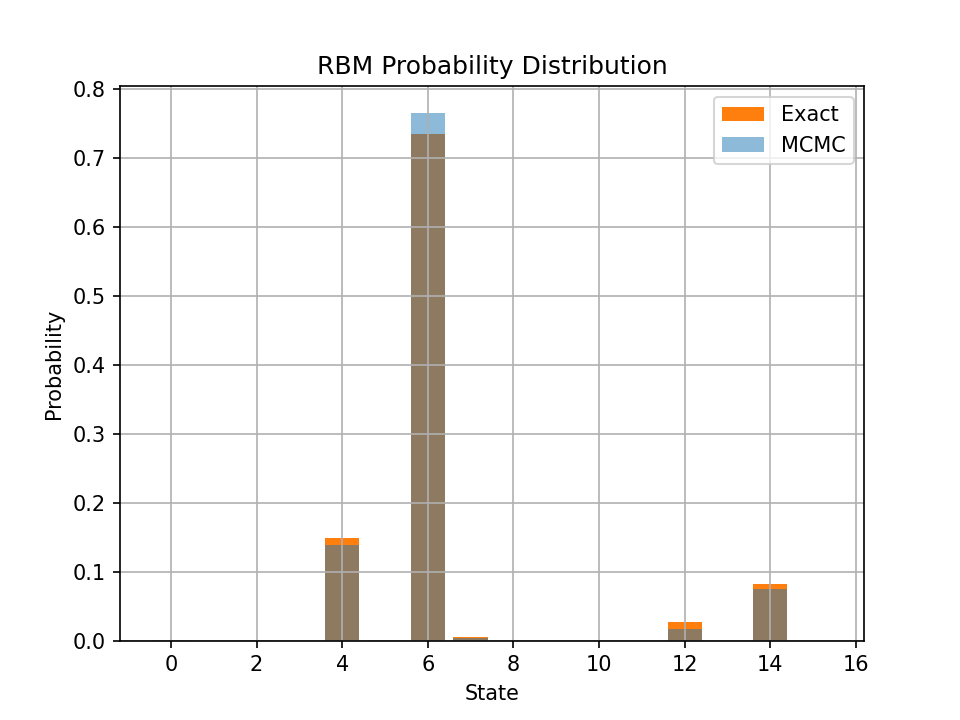

In [6]:
plt.figure(1)
#plt.hist([utils.binary_array_to_int(state) for state in mcmc], 
#         density=True, 
#         bins=range(2**visible_size+1), 
#         edgecolor="white", 
#         align='left', 
#         rwidth = 1,
#         label='MCMC')
plt.bar([x for x in range(2**visible_size)], exact, color='tab:orange')
plt.bar([x for x in range(2**visible_size)], mcmc, color='tab:blue', alpha=0.5)

plt.title("RBM Probability Distribution")
plt.xlabel('State')
plt.ylabel('Probability')
plt.grid()
plt.legend(['Exact', 'MCMC'])


In [7]:
# Save figure as pdf
username = os.getlogin()
desktop_path = f"{os.path.expanduser(os.getenv('USERPROFILE'))}\\Desktop"

date_format = '%Y.%m.%d:%H%M'

path = f"{desktop_path}/MCMC_10000_steps.pdf"

plt.savefig(f"{path}",bbox_inches = "tight")

In [1]:

visible_size = 8
hidden_size = 8


seed = 42  # Seed for random number generator

error_list = []
for i in range(1,5):
    walker_steps = 10**i
    np.random.seed(seed)
    H = RandomHamiltonian(n=visible_size)
    rbm = RBM(visible_size=visible_size, hidden_size=hidden_size, hamiltonian=H, walker_steps=walker_steps)


    mcmc, _ = np.histogram([utils.binary_array_to_int(state) for state in rbm.mcmc_dist()], 
             density=True, 
             bins=range(2**visible_size+1))
    exact= rbm.probability_dist()
    exact = exact.reshape(-1)
    error_list.append(rms_error(mcmc, exact))
    print(f"Error: {error_list[-1]}")


NameError: name 'np' is not defined

In [ ]:

plt.plot([10**i for i in range(1,5)], error_list, marker="o")
plt.grid()
plt.xlabel('MCMC steps')
plt.ylabel('RMS error')



In [26]:
# Save figure as pdf
username = os.getlogin()
desktop_path = f"{os.path.expanduser(os.getenv('USERPROFILE'))}\\Desktop"

date_format = '%Y.%m.%d:%H%M'

path = f"{desktop_path}/MCMCErrorByStepslog.pdf"

plt.savefig(f"{path}",bbox_inches = "tight")

In [10]:

seed = 42  # Seed for random number generator
error_array = []
steps_array = []
target_list =[]

for v in [2, 5, 9, 12]:
    visible_size = v
    hidden_size = v
    error_list = []

    
    i=1
    
    np.random.seed(seed)
    H = IsingHamiltonianReduced(n=visible_size)
    
    while True:
        walker_steps = 100*i
        rbm = RBM(visible_size=visible_size, hidden_size=hidden_size, hamiltonian=H, walker_steps=walker_steps)
        

        mcmc, _ = np.histogram([utils.binary_array_to_int(state) for state in rbm.mcmc_dist()], 
                 density=True, 
                 bins=range(2**visible_size+1))
        exact= rbm.probability_dist()
        exact = exact.reshape(-1)
        error = rms_error(mcmc, exact)
        error_list.append(error)
        
        print(f"Visible_size: {v}, error: {error_list[-1]}")
        
        i+=1
        if error < 0.1:
            error_array.append(error_list)
            steps_array = [10* j for j in range(1, i)]
            target_list.append(i)
            
            break


Visible_size: 2, error: 0.32141750126738744
Visible_size: 2, error: 0.17747199397348015
Visible_size: 2, error: 0.20997797604199722
Visible_size: 2, error: 0.22549515409048967
Visible_size: 2, error: 0.23224140346954214
Visible_size: 2, error: 0.12712706072990104
Visible_size: 2, error: 0.12277394160825077
Visible_size: 2, error: 0.25005233371061936
Visible_size: 2, error: 0.25296457960129975
Visible_size: 2, error: 0.13572377594352156
Visible_size: 2, error: 0.14997392981105725
Visible_size: 2, error: 0.09629709811648933
Visible_size: 5, error: 0.8002552889387159
Visible_size: 5, error: 0.4698340458292804
Visible_size: 5, error: 0.41444200129177905
Visible_size: 5, error: 0.375259240250688
Visible_size: 5, error: 0.2481677480559266
Visible_size: 5, error: 0.40909883219195553
Visible_size: 5, error: 0.3457394048876864
Visible_size: 5, error: 0.3212023530731628
Visible_size: 5, error: 0.3205792920263629
Visible_size: 5, error: 0.31799911720460067
Visible_size: 5, error: 0.32503279010021

KeyboardInterrupt: 

<IPython.core.display.Javascript object>


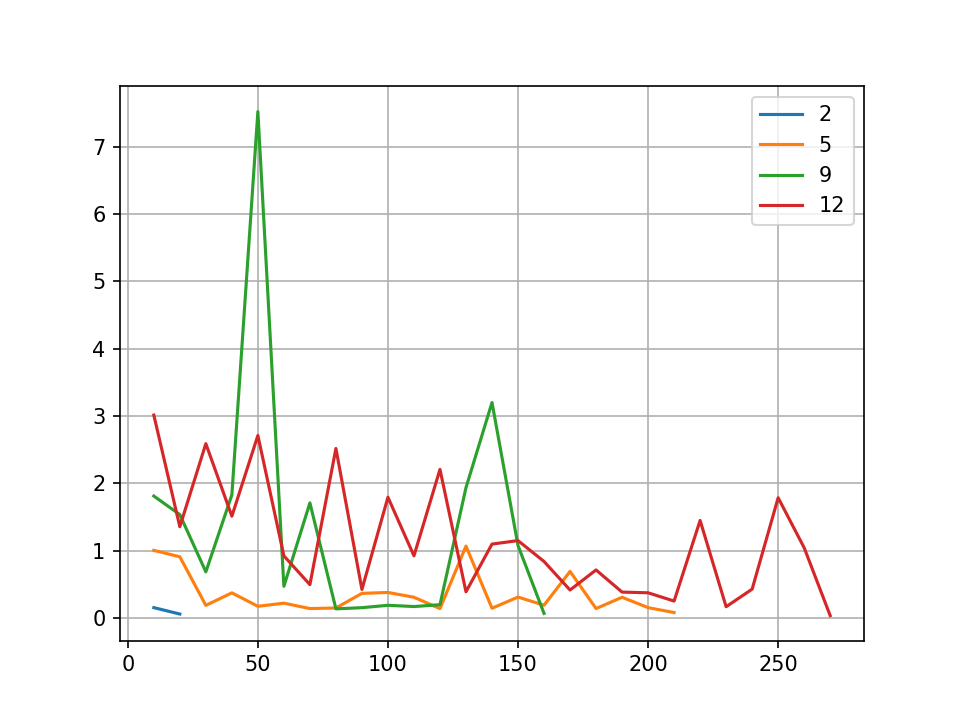

In [135]:
plt.figure(0)

#yint = range(min(), math.ceil(visible_list))+1)
#plt.yticks(yint)
labels=[]
for errors in error_array:
    plt.plot([10*j for j in range(1, len(errors)+1)], errors)

plt.legend([2, 5, 9, 12])    
plt.grid()